In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

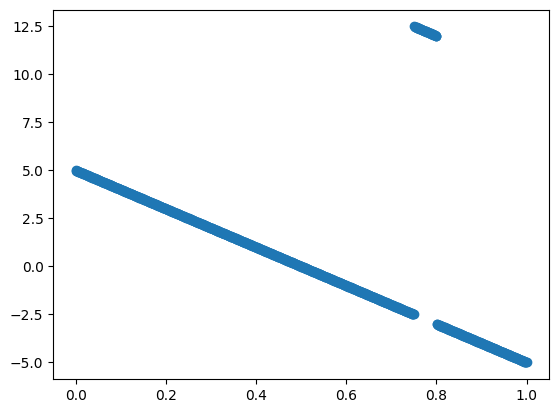

In [ ]:
x, y = generate_data()
plt.scatter(x, y)

The line `y = -10*x + 5` has a discontinuity between `x = (0.75, 0.8)`. We could also interpret this discontinuity as outlier points.

# 2. Implement linear regression (2.5 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

In [ ]:
def linear_regression_L2(x, y, max_epochs, learning_rate):
    m=0
    b=0
    loss_log = []
    for epoch in range(max_epochs):
        #compute L2 loss and gradients with respect to m and b
        y_hat = m*x + b
        L = np.mean(np.square(y_hat - y) / 2)
        L_m_gradient = np.mean(np.multiply((y_hat - y), x))
        L_b_gradient = np.mean((y_hat - y))
        #apply gradients to weight and bias
        m -= learning_rate * L_m_gradient
        b -= learning_rate * L_b_gradient
        loss_log.append(L)
        print(epoch,'- Loss: ', L)
    return m, b, loss_log

In [ ]:
m_L2, b_L2, loss_log_L2 = linear_regression_L2(x, y, 3500, 0.03)

0 - Loss:  7.735443777110443
1 - Loss:  7.716817422969823
2 - Loss:  7.698874585670871
3 - Loss:  7.681567055394664
4 - Loss:  7.664850208321691
5 - Loss:  7.6486827391183825
6 - Loss:  7.633026413383019
7 - Loss:  7.6178458385619
8 - Loss:  7.603108251957618
9 - Loss:  7.588783324554203
10 - Loss:  7.574842979479003
11 - Loss:  7.5612612240092405
12 - Loss:  7.548013994112646
13 - Loss:  7.535079010587003
14 - Loss:  7.522435645933153
15 - Loss:  7.510064801160665
16 - Loss:  7.497948791785062
17 - Loss:  7.486071242330789
18 - Loss:  7.474416988705327
19 - Loss:  7.462971987857159
20 - Loss:  7.451723234174139
21 - Loss:  7.440658682119329
22 - Loss:  7.429767174638952
23 - Loss:  7.4190383769117725
24 - Loss:  7.4084627150413755
25 - Loss:  7.398031319322552
26 - Loss:  7.3877359717405096
27 - Loss:  7.377569057387089
28 - Loss:  7.367523519501738
29 - Loss:  7.357592817866778
30 - Loss:  7.347770890306734
31 - Loss:  7.338052117060073
32 - Loss:  7.32843128780909
33 - Loss:  7.3189

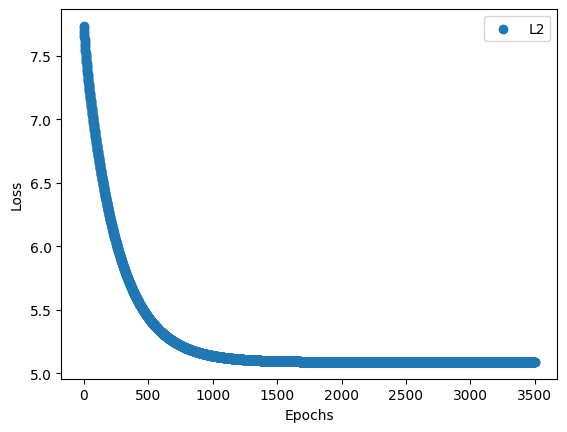

In [ ]:
plt.scatter(np.arange(len(loss_log_L2)), loss_log_L2, label = 'L2')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


Weight:  -7.519862747680976
Bias: 4.509663067787567


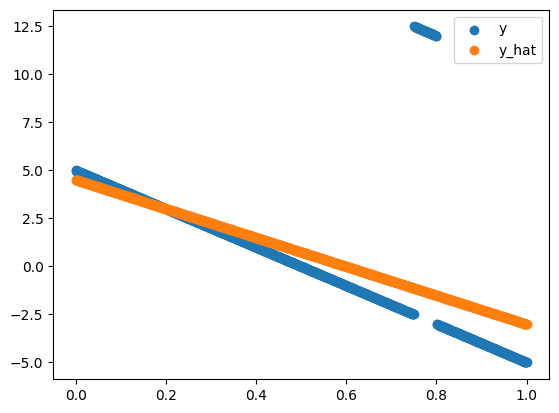

In [ ]:
plt.scatter(x, y, label = 'y')
plt.scatter(x, m_L2*x+b_L2, label = 'y_hat')
plt.legend()

print('Weight: ', m_L2)
print('Bias:', b_L2)

The values `m = -7.5` and `b = 4.5` are far from the original values `-10` and `4`. The linear regression model trained with the L2 loss is highly influenced by the outliers present in the interval `x = (0.75, 0.8)`.

# 4. "Robust" linear regression (1 point)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

In [ ]:
def linear_regression_L1(x, y, max_epochs, learning_rate):
    m=0
    b=0
    loss_log = []
    for epoch in range(max_epochs):
        #compute L1 loss and gradients in respect to m and b
        y_hat = m*x + b
        L = np.mean(np.absolute(y_hat - y))
        L_m_gradient = np.mean(np.multiply(((y_hat - y) / np.absolute(y_hat - y)), x))
        L_b_gradient = np.mean((y_hat - y) / np.absolute(y_hat - y))
        #apply gradients to m and b
        m -= learning_rate * L_m_gradient
        b -= learning_rate * L_b_gradient
        loss_log.append(L)
        print(epoch,'- Loss: ', L)
    return m, b, loss_log

In [ ]:
m_L1, b_L1, loss_log_L1 = linear_regression_L1(x, y, 3500, 0.02)

0 - Loss:  2.9772272272272278
1 - Loss:  2.976430564448332
2 - Loss:  2.975633901669437
3 - Loss:  2.974837238890542
4 - Loss:  2.9740405761116473
5 - Loss:  2.9732439133327517
6 - Loss:  2.9724472505538575
7 - Loss:  2.971650587774962
8 - Loss:  2.9708539249960673
9 - Loss:  2.970057262217172
10 - Loss:  2.969260599438277
11 - Loss:  2.9684639366593824
12 - Loss:  2.9676672738804872
13 - Loss:  2.9668706111015917
14 - Loss:  2.966073948322697
15 - Loss:  2.965277285543802
16 - Loss:  2.9644806227649068
17 - Loss:  2.963683959986012
18 - Loss:  2.9628872972071165
19 - Loss:  2.962091055483912
20 - Loss:  2.9612953907519532
21 - Loss:  2.960499726019994
22 - Loss:  2.9597040612880345
23 - Loss:  2.9589083965560756
24 - Loss:  2.9581127318241167
25 - Loss:  2.9573170670921574
26 - Loss:  2.9565214023601984
27 - Loss:  2.9557257376282386
28 - Loss:  2.9549300728962797
29 - Loss:  2.95413440816432
30 - Loss:  2.9533387434323615
31 - Loss:  2.9525430787004026
32 - Loss:  2.9517474139684428


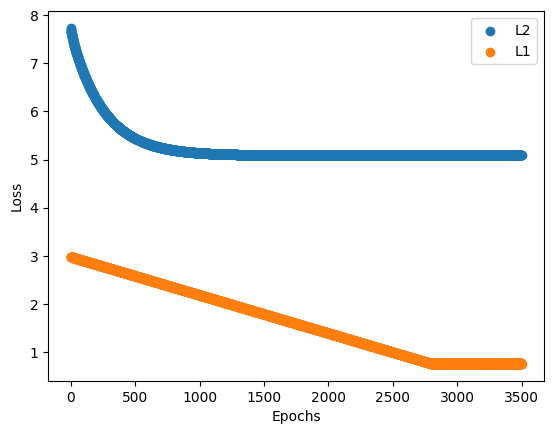

In [ ]:
plt.scatter(np.arange(len(loss_log_L2)), loss_log_L2, label = 'L2')
plt.scatter(np.arange(len(loss_log_L1)), loss_log_L1, label = 'L1')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

The L1 loss curve behaves as a negatively sloped straight line until reaching convergence.

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

Weight:  -9.990991271271373
Bias: 5.017239999999905


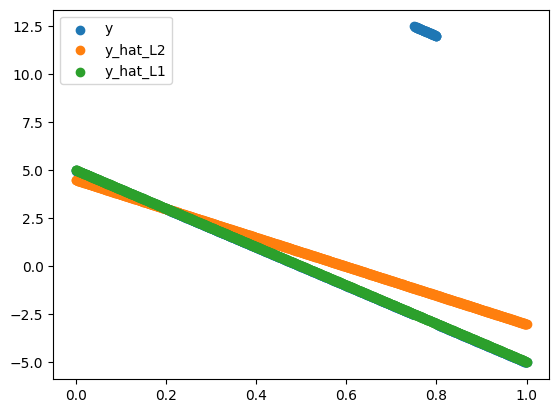

In [ ]:
plt.scatter(x, y, label = 'y')
plt.scatter(x, m_L2*x + b_L2, label = 'y_hat_L2')
plt.scatter(x, m_L1*x + b_L1, label = 'y_hat_L1')
plt.legend()

print('Weight: ', m_L1)
print('Bias:', b_L1)

The new values `m = -9.99` and `b = 5.01` learned by the L1 linear regression model are much closer to the original values `-10` and `4`. Observing the L1 and L2 predicted lines shows that the L1 variant is much closer to the original line. This plot exemplifies how L1 linear regression is more "robust" to outlier points when compared to L2  linear regression.